Exploration

In [87]:
data <- read.csv(file.path("..", "data", "training_data.csv"))
data<-data[,-which(names(data) %in% c("SWEETORSOUR"))] #to remove the SWEETORSOUR response variable

In [3]:
#predictors, type of data
data

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0
low,56,FALSE,116.0,170.22,7.401,15.349,22.745,16.261,25.285,...,0,0,0,0,1,0,0,0,1,0
low,52,FALSE,25.0,114.26,4.395,12.741,24.952,14.853,29.737,...,0,0,0,0,0,0,0,0,0,0
low,53,TRUE,355.0,268.30,7.666,21.304,36.025,21.614,39.950,...,0,0,1,0,1,1,1,1,1,1
low,1,FALSE,68.4,152.26,9.516,9.911,16.342,11.250,17.920,...,0,0,0,0,0,0,0,0,0,0


In [88]:
dim(data) #708 observations pour 4870 predictors
str(data) #a lot of diffent sorts of predictors : int, bool, num...
names(data)
sum(colSums(apply(data,2,is.na))) #there is no NA in the data

[1]  708 4871

'data.frame':	708 obs. of  4871 variables:
 $ Intensity             : Factor w/ 2 levels "high","low": 2 1 1 1 2 1 2 2 2 2 ...
 $ VALENCE.PLEASANTNESS  : int  45 49 56 7 51 21 56 52 53 1 ...
 $ complexity.from.pubmed: num  302 72.6 259 56.6 84.7 160 116 25 355 68.4 ...
 $ MW                    : num  208.3 122.2 242.3 88.1 136.2 ...
 $ AMW                   : num  5.95 6.43 7.57 6.29 6.19 ...
 $ Sv                    : num  19.7 11.35 20.83 7.54 12.88 ...
 $ Se                    : num  34.5 18.7 32.2 14.2 21.6 ...
 $ Sp                    : num  21.52 12.26 21.69 7.96 14.02 ...
 $ Si                    : num  39.6 21.3 35.5 16.1 24.7 ...
 $ Mv                    : num  0.563 0.597 0.651 0.538 0.585 0.588 0.667 0.49 0.609 0.619 ...
 $ Me                    : num  0.985 0.987 1.005 1.014 0.983 ...
 $ Mp                    : num  0.615 0.645 0.678 0.568 0.637 0.633 0.707 0.571 0.618 0.703 ...
 $ Mi                    : num  1.13 1.12 1.11 1.15 1.12 ...
 $ nAT                   : int  35 

[1]  708 4871

[1] 0

In [4]:
#Verify the dimension of the test and sample submission datas
data_test <- read.csv(file.path("..", "data", "test_data.csv"))
data_sub <- read.csv(file.path("..", "data", "sampleSubmission.csv"))
dim(data_test)
dim(data_sub)
#--> test data : the pleasantness and sweetorsour are outside of the data
#--> sample submission : what we have suppose to put on kaggle 

[1]   68 4871

[1] 69  2

[1] 43.57345

[1] 16

[1] 0

[1] 432

[1] 98

,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
16,high,0,52.5,130.26,4.824,13.456,26.28,15.307,30.946,0.498,...,0,0,0,0,0,0,0,0,0,0


,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
432,high,98,143,170.28,5.676,16.171,29.607,17.762,34.156,0.539,...,0,0,0,0,1,0,0,0,1,0


,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
432,high,98,143.0,170.28,5.676,16.171,29.607,17.762,34.156,0.539,...,0,0,0,0,1,0,0,0,1,0
555,low,97,86.9,156.30,5.042,15.983,30.163,18.069,35.361,0.516,...,0,0,0,0,0,0,0,0,1,0
612,low,96,89.3,144.24,5.548,13.644,25.723,15.000,29.740,0.525,...,0,0,0,0,0,0,0,0,0,0
219,low,95,116.0,142.22,5.926,13.117,23.840,14.239,27.325,0.547,...,0,0,0,0,0,0,0,0,0,0
553,low,95,160.0,180.22,7.209,15.305,25.284,15.932,28.119,0.612,...,0,0,0,0,1,0,1,0,1,0
314,low,93,119.0,116.08,9.673,7.913,13.076,7.341,13.668,0.659,...,0,0,0,0,0,0,0,0,0,0
468,low,92,115.0,150.19,7.152,13.064,21.073,13.716,23.495,0.622,...,0,0,0,0,0,0,0,0,0,0
627,low,92,103.0,138.18,6.909,12.064,20.073,12.716,22.495,0.603,...,0,0,0,0,0,0,0,0,0,0
315,high,90,126.0,150.19,7.152,13.064,21.073,13.716,23.495,0.622,...,0,0,0,0,0,0,0,0,0,0
528,high,90,151.0,154.28,5.320,15.456,28.280,17.307,32.946,0.533,...,0,0,0,0,0,0,0,0,1,0


,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
464,high,0,136.0,194.27,8.447,15.251,23.149,16.364,25.415,0.663,...,0,0,0,0,1,0,1,0,1,0
484,low,0,71.5,86.10,7.175,7.010,12.305,7.193,13.664,0.584,...,0,0,0,0,0,0,0,0,0,0
524,low,0,23.1,88.17,4.898,8.876,17.629,10.023,20.701,0.493,...,0,0,0,0,0,0,0,0,0,0
573,high,0,61.1,118.22,6.954,9.536,16.822,10.909,19.205,0.561,...,0,0,0,0,0,0,0,0,0,0
579,low,0,112.0,136.16,7.564,11.537,18.189,11.955,20.080,0.641,...,0,0,0,0,0,0,0,0,0,0
593,high,0,41.4,100.18,5.273,9.876,18.629,11.023,21.701,0.520,...,0,0,0,0,0,0,0,0,0,0
620,low,0,61.1,118.22,6.954,9.536,16.822,10.909,19.205,0.561,...,0,0,0,0,0,0,0,0,0,0
631,high,0,110.0,172.30,5.384,16.698,31.491,18.523,36.571,0.522,...,0,0,0,0,1,0,0,0,1,0
639,high,0,66.5,102.15,6.009,9.064,17.073,9.716,19.495,0.533,...,0,0,0,0,0,0,0,0,0,0
683,high,0,173.0,214.31,7.654,17.019,28.244,18.341,31.455,0.608,...,0,0,1,0,1,0,1,0,1,0


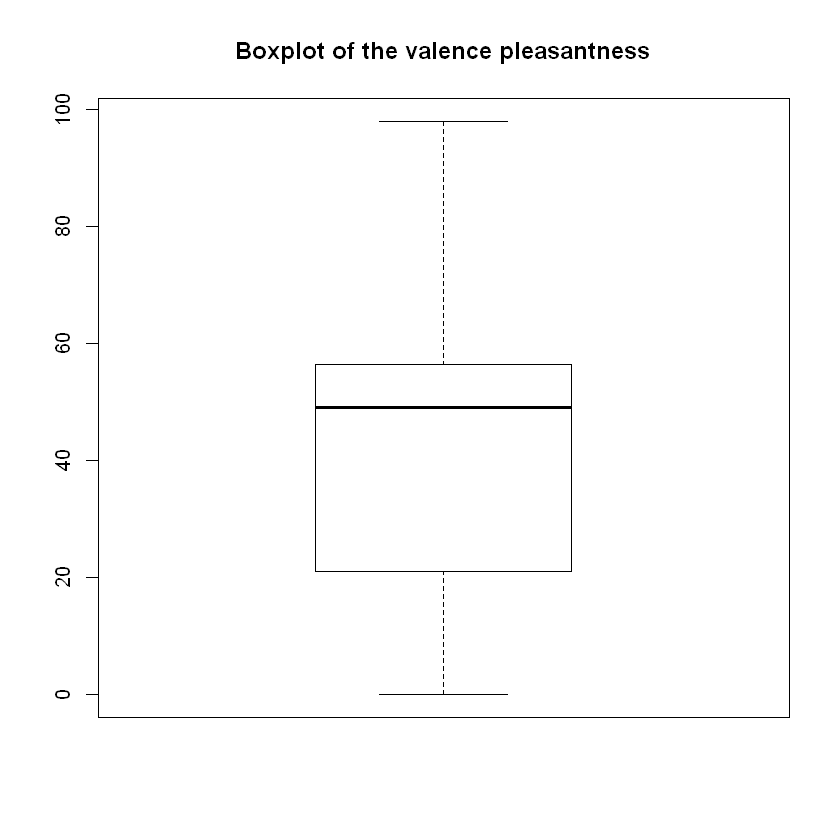

In [18]:
str(data$VALENCE.PLEASANTNESS)
mean(data$VALENCE.PLEASANTNESS) # mean value = 43.57
boxplot(data$VALENCE.PLEASANTNESS, main = 'Boxplot of the valence pleasantness')
which.min(data$VALENCE.PLEASANTNESS) 
data[16,]$VALENCE.PLEASANTNESS #min value = 0
which.max(data$VALENCE.PLEASANTNESS)
data[432,]$VALENCE.PLEASANTNESS #max value of pleasentness = 98
# --> % scale ?
data[16,] 
# The worst odor is high in intensity, sour
data[432,]
# The best odor is high in intensity, sweet

ordered_data <- data[order(data$VALENCE.PLEASANTNESS, decreasing = T),]
ordered_data[1:10,]
ordered_data[698:708,]
# By taking the 10 best and 10 worst odors we can see a tendance that :
# - the best odors tends to be more sweet and the worst odors tend to be more sour --> try to do a plot
# - it seems to have no linear association between intensity and the plesantness --> plot
# - Other predictors to check ??

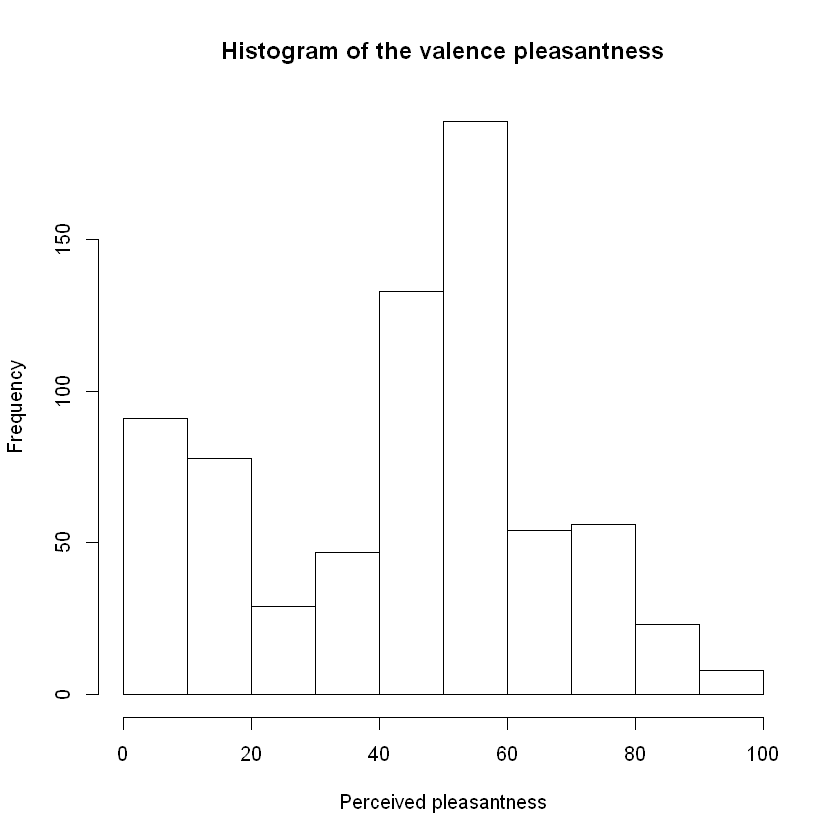

In [6]:
#observe the general distribution of pleasantness
hist(data$VALENCE.PLEASANTNESS, xlab="Perceived pleasantness",main="Histogram of the valence pleasantness")

#--> approximately normal with stronger left tail

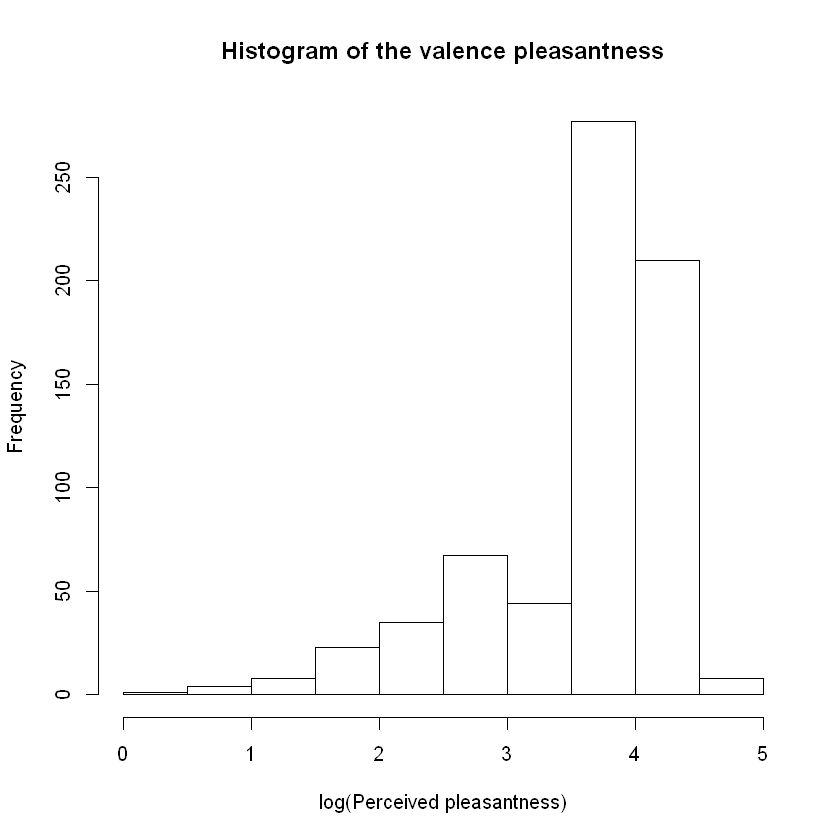

In [7]:
#The general distribution of the log(pleasantness) (jsp si c'est utile ??)

#install.packages("berryFunctions")
#library('berryFunctions')
hist(log(data$VALENCE.PLEASANTNESS), xlab="log(Perceived pleasantness)",main="Histogram of the valence pleasantness")
#logHist(data$VALENCE.PLEASANTNESS) 
#--> J'arrive pas à mettre l'echelle log sur l'axe des x ??
#--> We can see that the distribution of the log(pleasantness) linear until a certain level

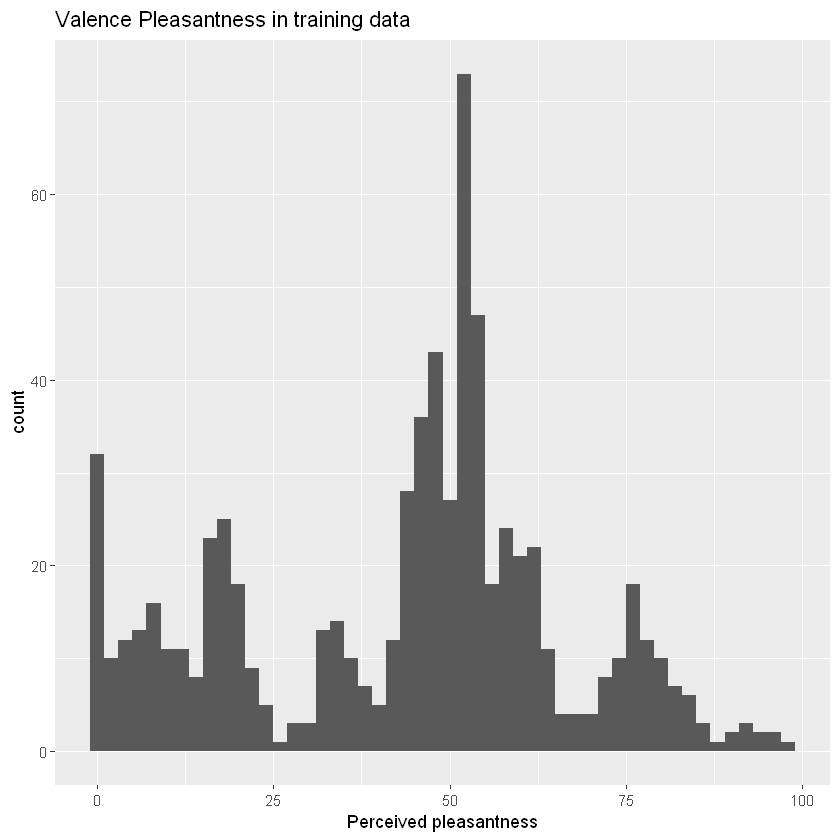

In [12]:
library(ggplot2)
ggplot(data, aes(x=VALENCE.PLEASANTNESS)) + geom_histogram(binwidth=2)+labs(title="Valence Pleasantness in training data ",x="Perceived pleasantness")


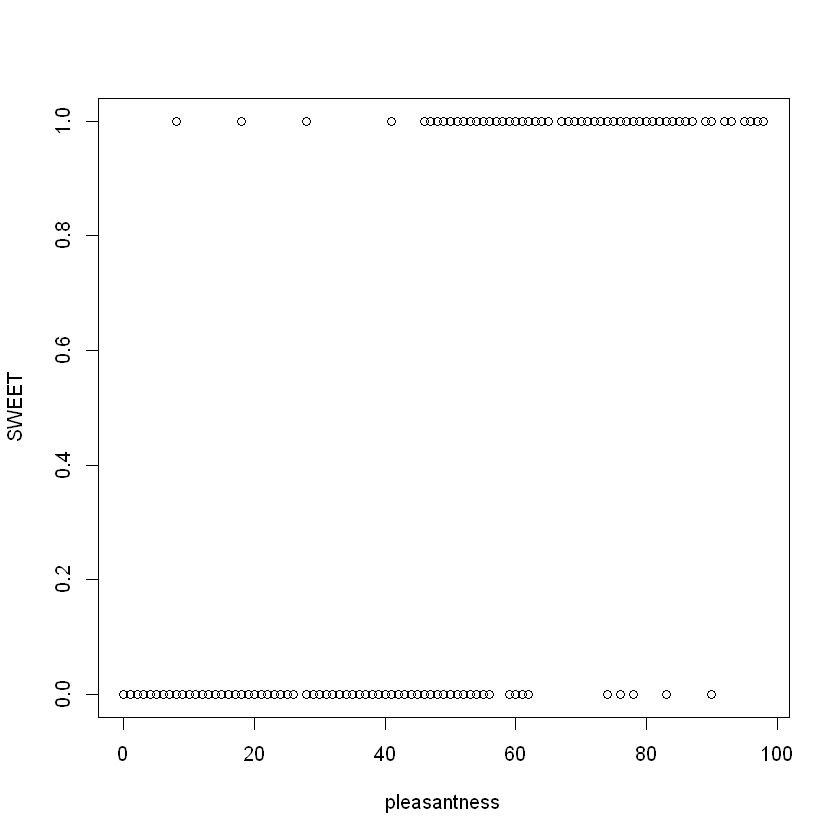

In [8]:
#est -ce qu'on enlève ce plot?

#verify if there is a  possible clear link between sweetORsour and pleasantness
plot(data$VALENCE.PLEASANTNESS,data$SWEETORSOUR,xlab="pleasantness", ylab="SWEET")

#--> we can see that there is a direct link between the pleasantness and if the odor is sweet or not
#--> The most pleasant odor tend to be more sweet and the less pleasant tend to be more sour even of there are some outliers
#--> It confirms the tendance that we saw with the 10th best and worst pleasent odors above

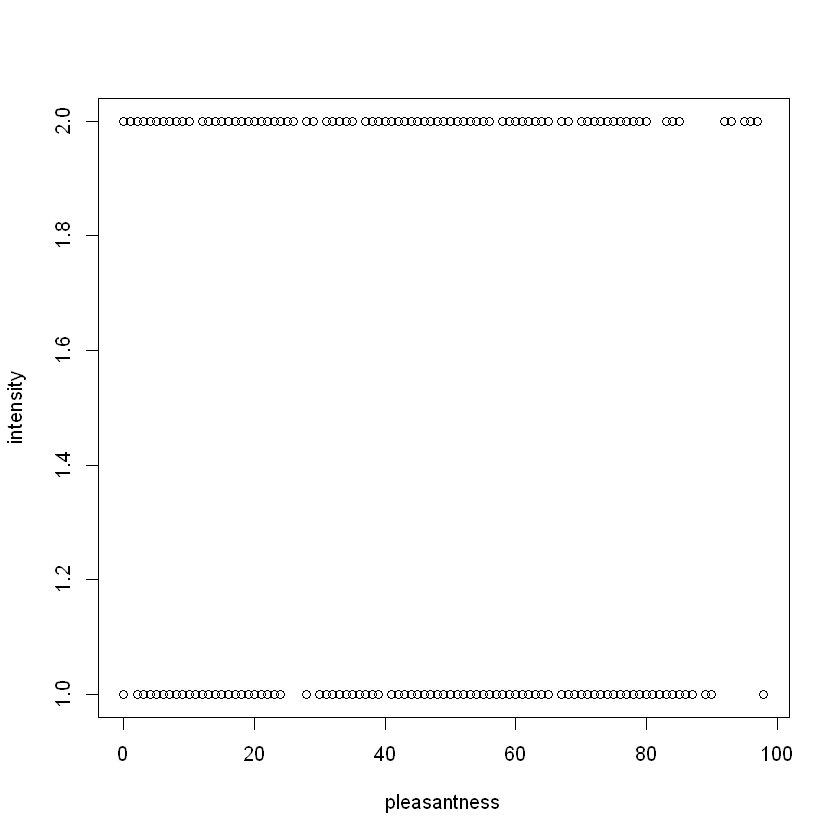

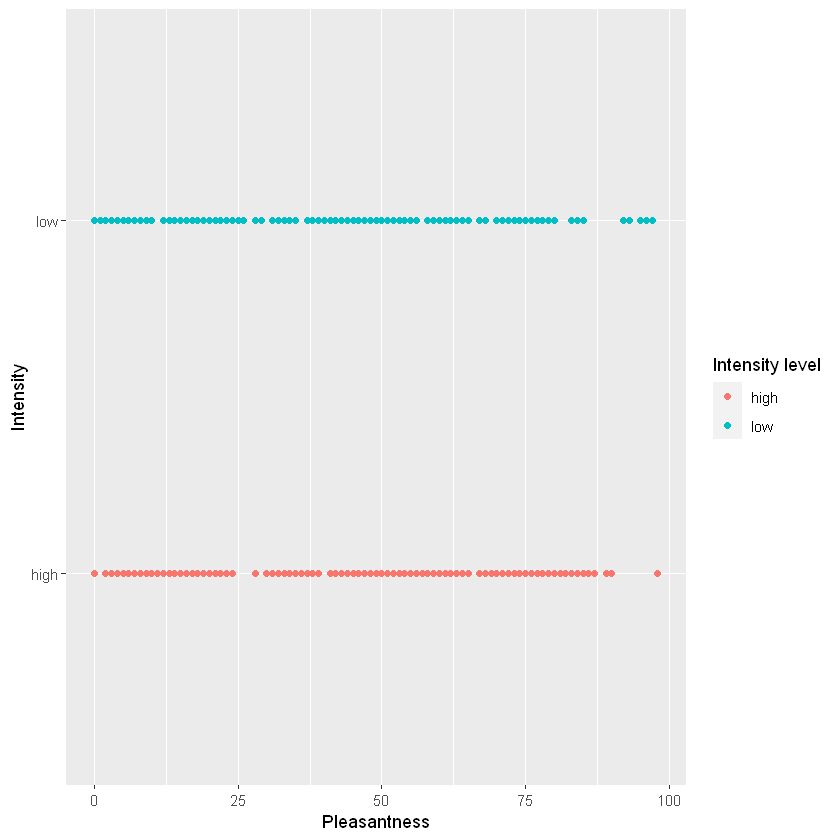

In [29]:
#verify if there is a  possible clear link between intensity and pleasantness
plot(data$VALENCE.PLEASANTNESS,as.factor(data$Intensity),xlab="pleasantness", ylab="intensity")
library(ggplot2)
ggplot(data, aes(x=VALENCE.PLEASANTNESS, y=as.factor(Intensity), color=as.factor(Intensity)))+geom_point()+labs(x="Pleasantness", y="Intensity",color="Intensity level")

##--> no clear link

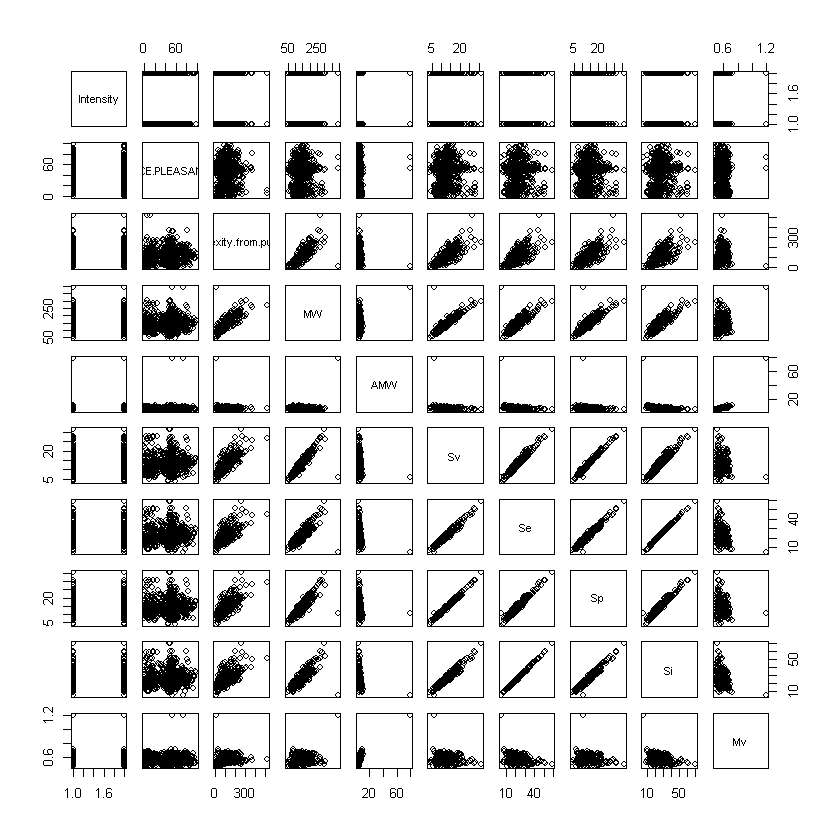

In [2]:
#visualize pairwise interactions
pairs(data[1:10])

In [ ]:
#on voit que les Sv, SE, Sp etc sont fortement  correlé entre eux, il faudrait peut-être traiter les données dans ce sens

In [94]:
#Variance = 0
datav <- data
datav <- datav[ , which(apply(datav, 2, var) != 0)] 
dim(datav)
#--> there is 1842 predictors whose variance equal 0
#--> They are not useful to predict model ; so we can delete them from the list of predictors

[1]  708 3028

In [109]:
#Correlation
datac <- data[,-which(names(data) %in% c("VALENCE.PLEASANTNESS"))]
datac$Intensity<-as.numeric(as.factor(datac$Intensity))
datac<-datac[ , which(apply(datac, 2, var) != 0)] 
dim(datac)
cor_matrix <- cor(datac)
n = 0
cor_i <- c()
cor_j <- c()
for(i in 1:nrow(cor_matrix)) {
    for(j in 1:i) #because the correlation matrix is symetric
        if(i != j) {
            if(cor_matrix[i,j] == 1) {
                n = n + 1
                cor_i <- c(cor_i,i)
                cor_j <- c(cor_j,j)
            }   
        }          
}
n
cor_i <- c(cor_i,0)
filtered_cor_i <- c()
for(i in 1:n) {
    if(cor_i[i] != cor_i[i+1]) filtered_cor_i <- c(filtered_cor_i,cor_i[i])
}
length(filtered_cor_i)
filtered_data <- datac
filtered_data <- filtered_data[,-filtered_cor_i]
filtered_data
dim(filtered_data)

#--> We found 352 correlations that are equal to 1 and when we count the predictors that are many times correlated only
# one time, we can put off 147 predictors 

[1]  708 3028

[1] 352

[1] 147

Intensity,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
2,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,0.985,...,0,0,1,0,1,0,1,0,1,0
1,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,0.987,...,0,0,0,0,0,0,0,0,0,0
1,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,1.005,...,1,0,1,0,1,1,1,0,1,1
1,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,1.014,...,0,0,0,0,0,0,0,0,0,0
2,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,0.983,...,0,0,0,0,0,0,0,0,0,0
1,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,0.991,...,0,0,0,0,1,0,1,0,1,0
2,116.0,170.22,7.401,15.349,22.745,16.261,25.285,0.667,0.989,...,0,0,0,0,1,0,0,0,1,0
2,25.0,114.26,4.395,12.741,24.952,14.853,29.737,0.490,0.960,...,0,0,0,0,0,0,0,0,0,0
2,355.0,268.30,7.666,21.304,36.025,21.614,39.950,0.609,1.029,...,1,0,1,0,1,1,1,1,1,1
2,68.4,152.26,9.516,9.911,16.342,11.250,17.920,0.619,1.021,...,0,0,0,0,0,0,0,0,0,0


[1]  708 2881

In [99]:
#try the general linear fit for MSE baseline
fit<-lm(VALENCE.PLEASANTNESS~., data)
summary(fit)


Call:
lm(formula = VALENCE.PLEASANTNESS ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.773  -9.074   0.023   9.023  51.477 

Coefficients: (4536 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             2.065e+06  6.496e+07   0.032    0.975
Intensitylow            2.045e+00  1.440e+00   1.420    0.156
complexity.from.pubmed -1.725e+02  1.308e+03  -0.132    0.895
MW                      1.082e+04  8.745e+04   0.124    0.902
AMW                     2.130e+03  4.750e+03   0.448    0.654
Sv                      1.179e+05  2.081e+05   0.567    0.571
Se                      5.495e+05  3.099e+06   0.177    0.859
Sp                     -2.213e+05  1.304e+06  -0.170    0.865
Si                      2.496e+05  2.421e+06   0.103    0.918
Mv                      1.039e+06  7.256e+06   0.143    0.886
Me                     -6.282e+05  4.891e+06  -0.128    0.898
Mp                     -2.202e+05  8.249e+05

In [107]:
filtered_data$VALENCE.PLEASANTNESS <- data$VALENCE.PLEASANTNESS
filtered_fit <- lm(VALENCE.PLEASANTNESS~.,filtered_data)
summary(filtered_fit)


Call:
lm(formula = VALENCE.PLEASANTNESS ~ ., data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.773  -9.074   0.023   9.023  51.477 

Coefficients: (2547 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             2.065e+06  6.496e+07   0.032    0.975
Intensity               2.045e+00  1.440e+00   1.420    0.156
complexity.from.pubmed -1.725e+02  1.308e+03  -0.132    0.895
MW                      1.082e+04  8.745e+04   0.124    0.902
AMW                     2.130e+03  4.750e+03   0.448    0.654
Sv                      1.179e+05  2.081e+05   0.567    0.571
Se                      5.495e+05  3.099e+06   0.177    0.859
Sp                     -2.213e+05  1.304e+06  -0.170    0.865
Si                      2.496e+05  2.421e+06   0.103    0.918
Mv                      1.039e+06  7.256e+06   0.143    0.886
Me                     -6.282e+05  4.891e+06  -0.128    0.898
Mp                     -2.202e+05  

[1]  708 4871

[1]  708 3028

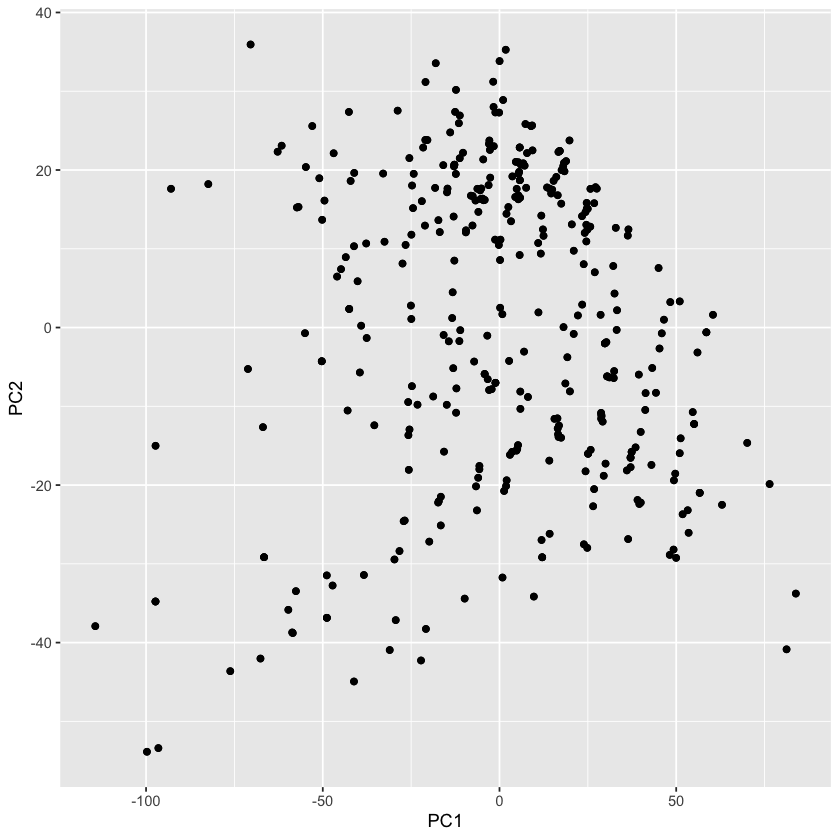

In [105]:
#PCA

datax<-data[,-which(names(data) %in% c("VALENCE.PLEASANTNESS"))]
datax$Intensity<-as.numeric(as.factor(datax$Intensity)) #more efficient, this way we only have one column with 1=high, 0=low
datax<-datax[ , which(apply(datax, 2, var) != 0)]
dim(data)
dim(datax)                                          
pca <- prcomp(datax, scale = T)
library(ggplot2)
ggplot(data.frame(pca$x),aes( x=PC1,y=PC2))+geom_point()

#--> We can't see different clusters